In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *

In [2]:
# Global variables and statistics
dataset = 'bm1'
benchmark_name = 'CNN in Keras on MNIST'
num_trials =10


In [3]:
# Read sequential optimization results
div10_results = {}
div30_results = {}

opt_secs = 7200
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div30_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(30)' + '.json')


In [4]:
max_accs = []
for i in range(30):
    max_acc = max(div30_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.993
0.9938
0.994
0.994
0.9936
0.9942
0.9936
0.9934
0.9944
0.9942
0.9936
0.9937
0.9937
0.994
0.9935
0.9937
0.9937
0.9935
0.9935
0.9938
0.9939
0.9933
0.9938
0.9937
0.9938
0.9932
0.9941
0.9939
0.9941
0.9934
avg. 0.9937 (0.0003)


<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

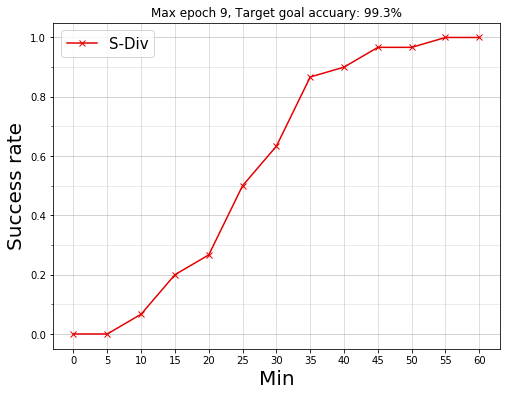

In [40]:
draw_success_rate_fig(div30_results, 0.993, 60*1 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=30,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='30 runs, Max epoch 9, Target goal accuary: 99.3%',
                                                 width=8, height=6)

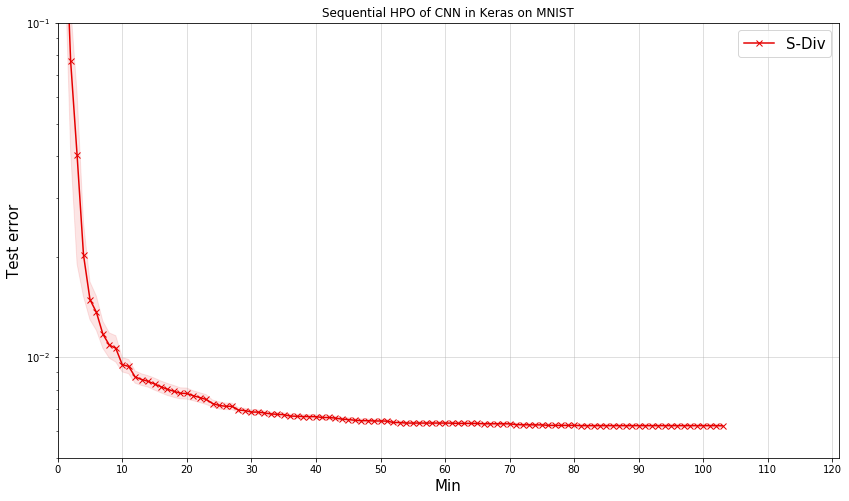

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [6]:
draw_best_error_curve(div30_results, ["S-Div"], 30, ylim=(.005, .1), xlim=(0, 60*2+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [50]:
div21_results = {}
opt_secs = 18000
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div21_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.(21)' + '.json')

In [51]:
max_accs = []
for i in range(21):
    max_acc = max(div21_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.9948
0.995
0.995
0.995
0.9949
0.9953
0.9952
0.9954
0.9953
0.9951
0.9952
0.9949
0.9952
0.995
0.995
0.9952
0.995
0.9952
0.9949
0.9954
0.9951
avg. 0.9951 (0.0002)


<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

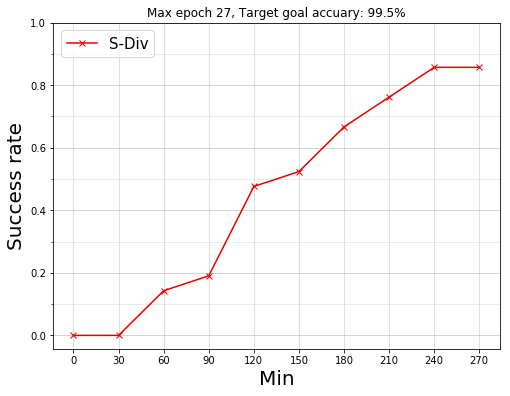

In [55]:
draw_success_rate_fig(div21_results, 0.995, 5 * 60, 
                                              x_unit='Min', step_size=30,
                                              num_runs=21,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='21 runs, Max epoch 27, Target goal accuary: 99.5%',
                                                 width=8, height=6)

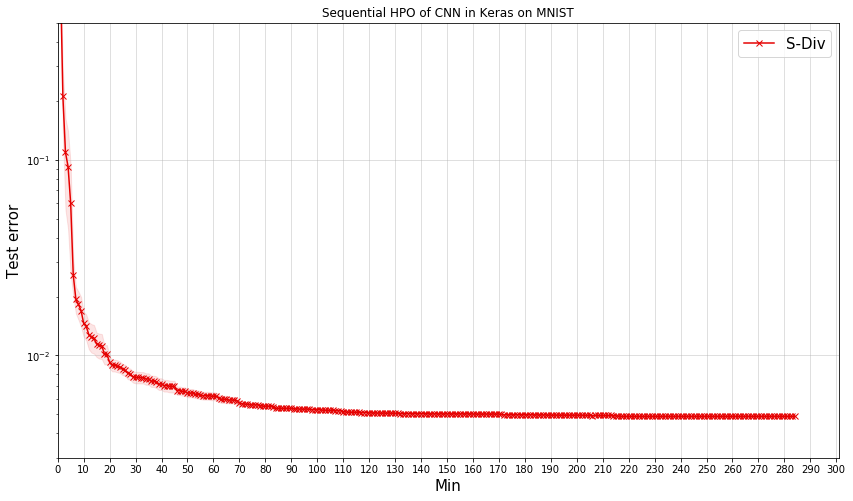

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [56]:
draw_best_error_curve(div21_results, ["S-Div"], 21, ylim=(.003, .5), xlim=(0, 60*5+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [7]:
opt_secs = 36000
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div10_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(10)' + '.json')

In [8]:
max_accs = []
for i in range(10):
    max_acc = max(div10_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.9959
0.9958
0.9962
0.9957
0.996
0.9958
0.9956
0.9959
0.9961
0.9957
avg. 0.9959 (0.0002)


<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

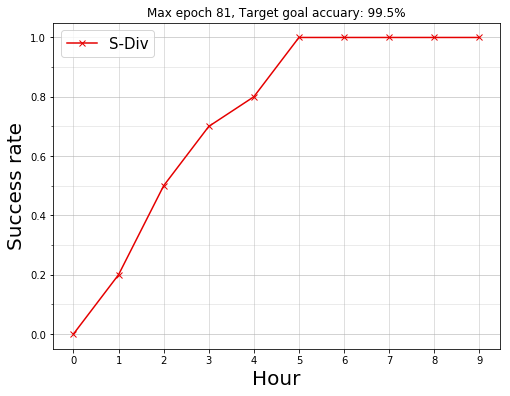

In [57]:
draw_success_rate_fig(div10_results, 0.995, 10, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=10,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='10 runs, Max epoch 81, Target goal accuary: 99.5%',
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

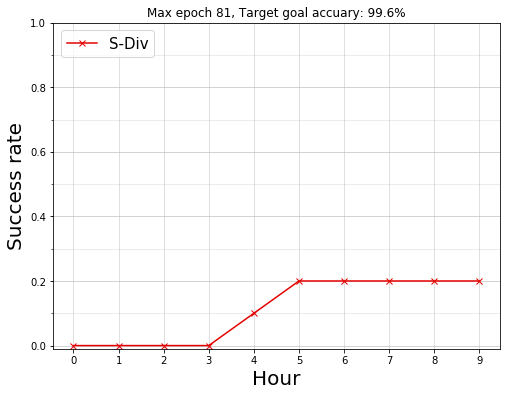

In [49]:
draw_success_rate_fig(div10_results, 0.996, 10, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=10,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='10 runs, Max epoch 81, Target goal accuary: 99.6%',
                                                 width=8, height=6)

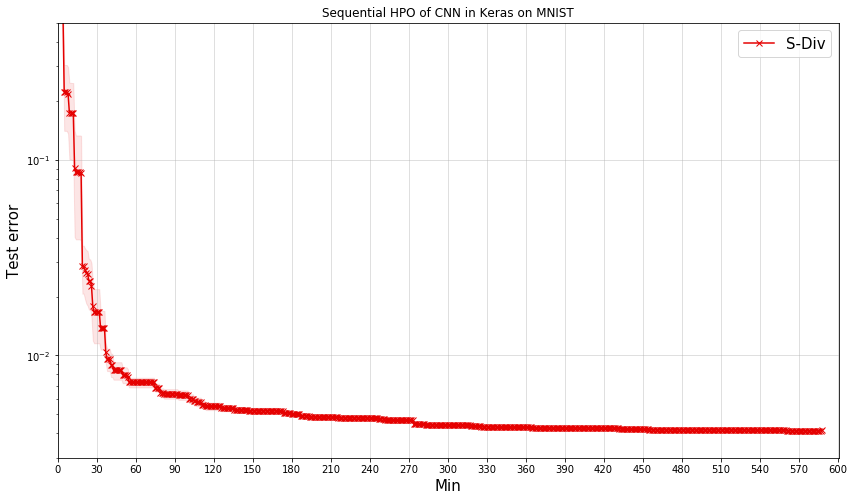

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [33]:
draw_best_error_curve(div10_results, ["S-Div"], 10, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [15]:
bohb_results  = {}
bohb_results['BOHB'] = load_json('./bm1/bohb_max_budget_81_result' + '.json')

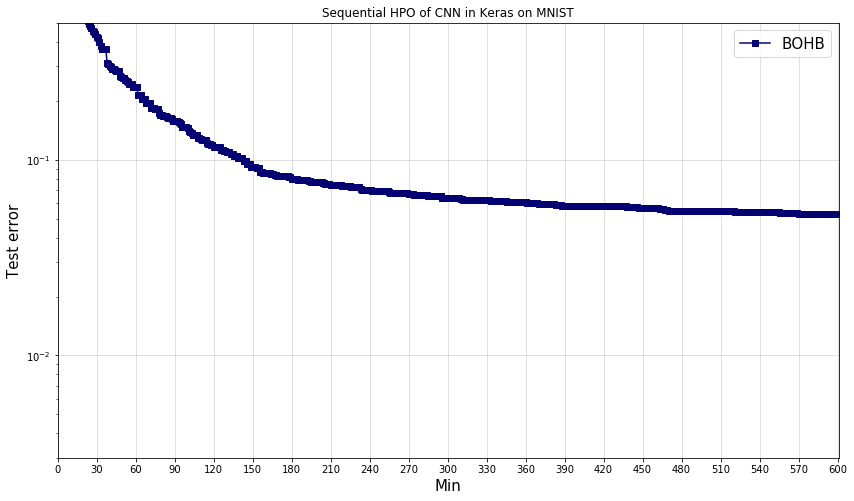

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [22]:
draw_best_error_curve(bohb_results, ["BOHB"], 1, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

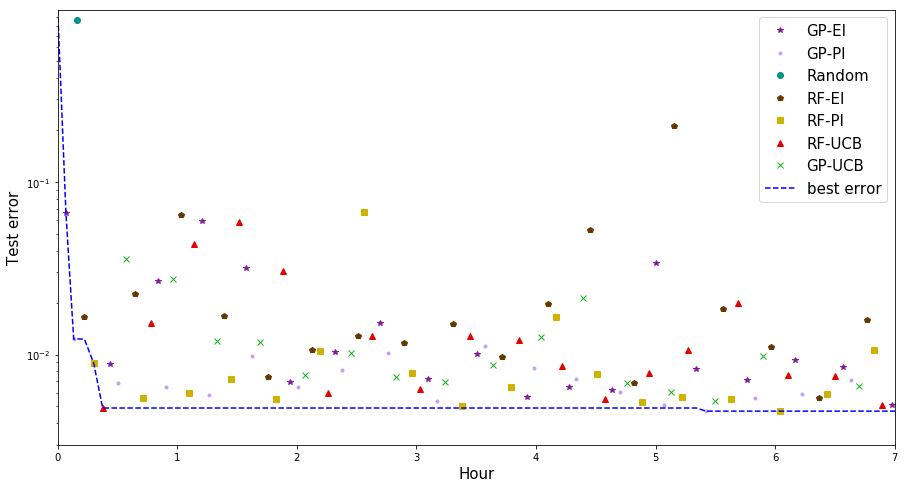

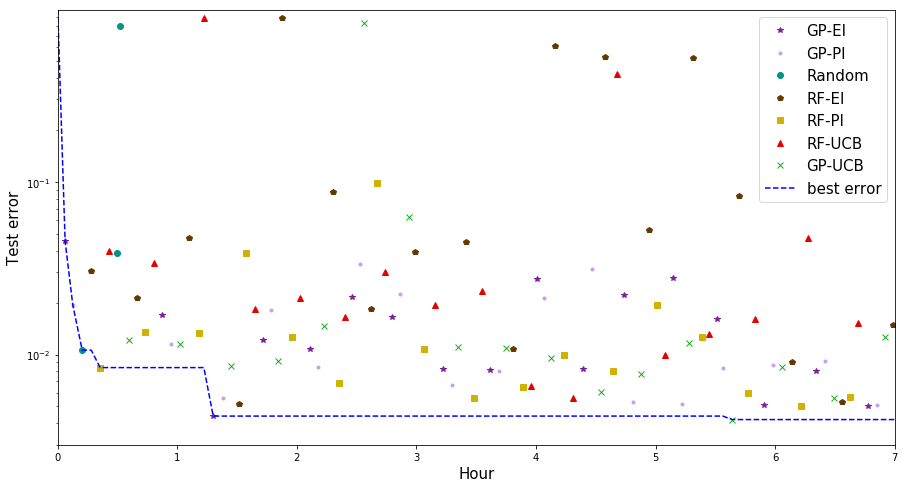

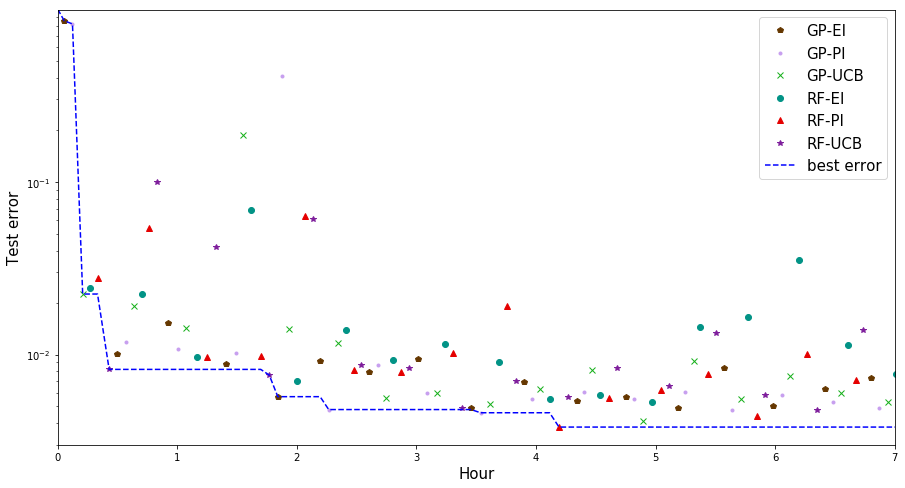

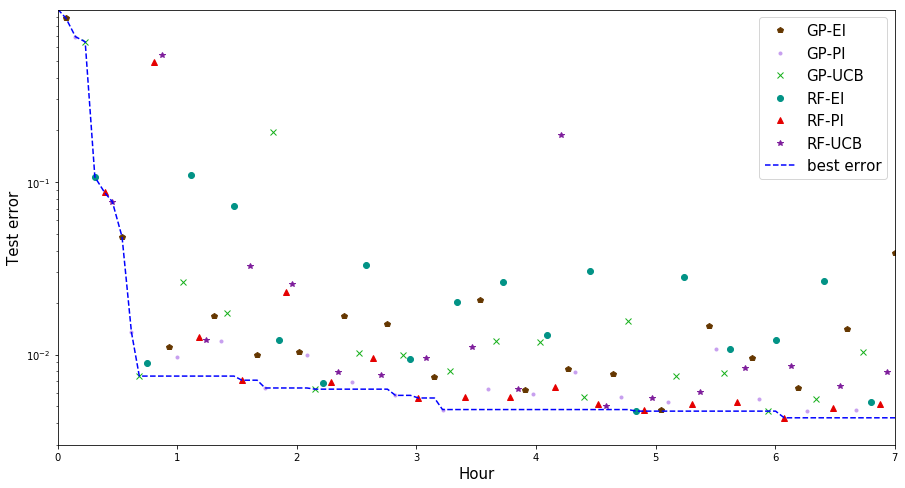

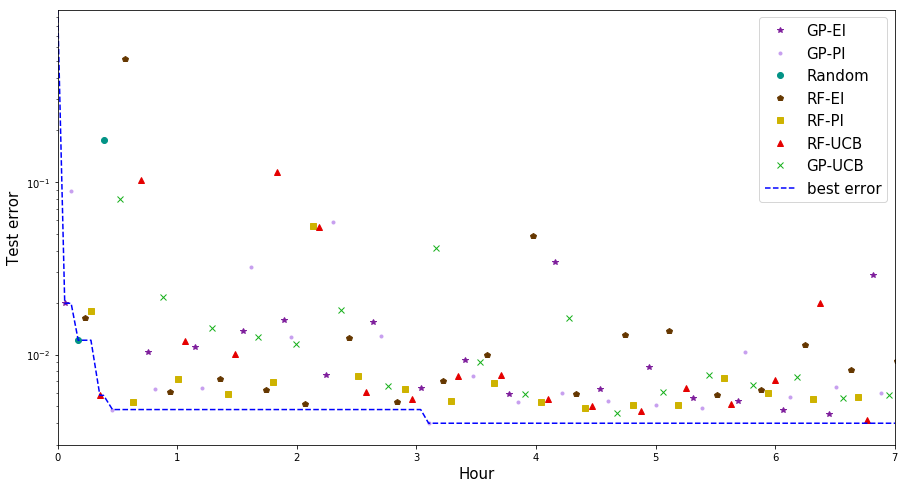

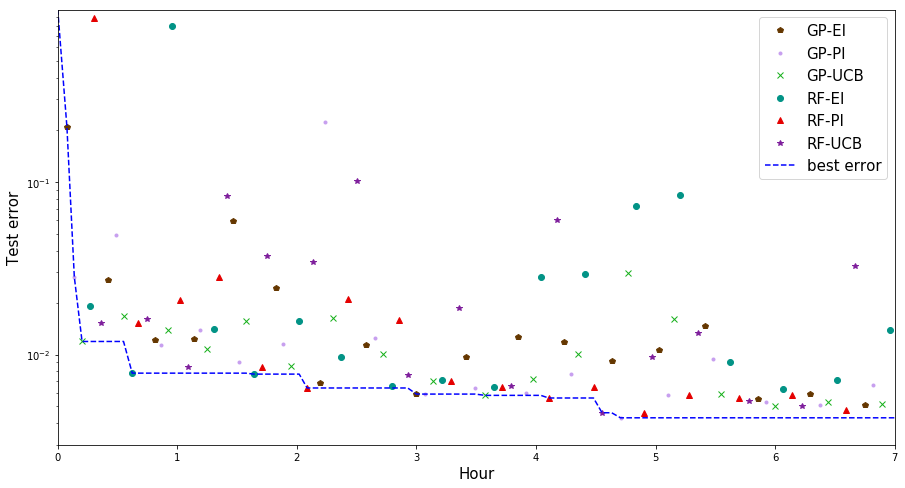

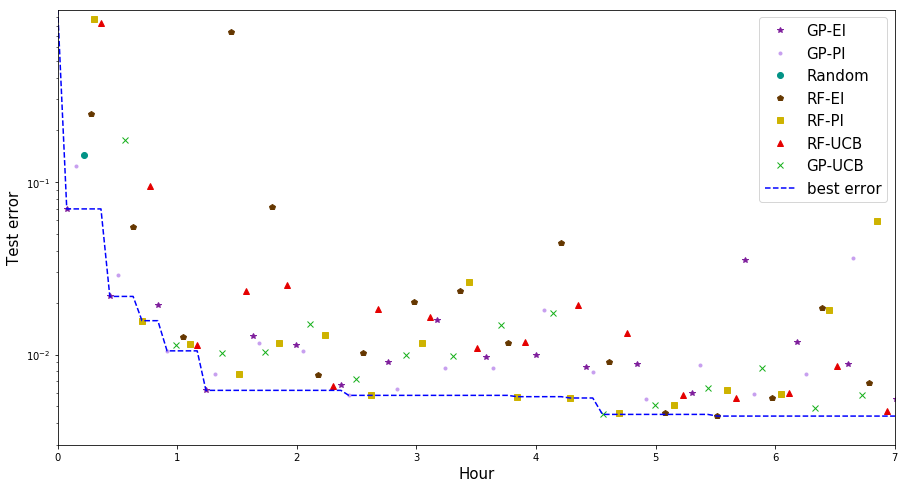

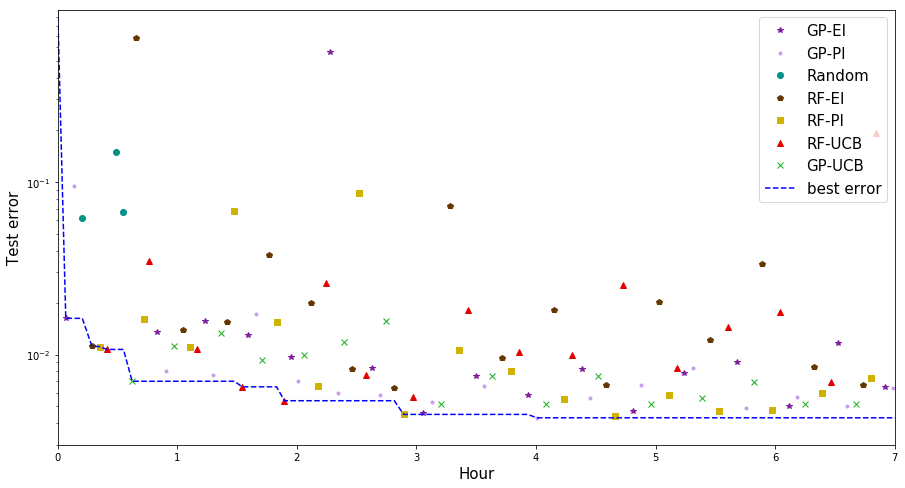

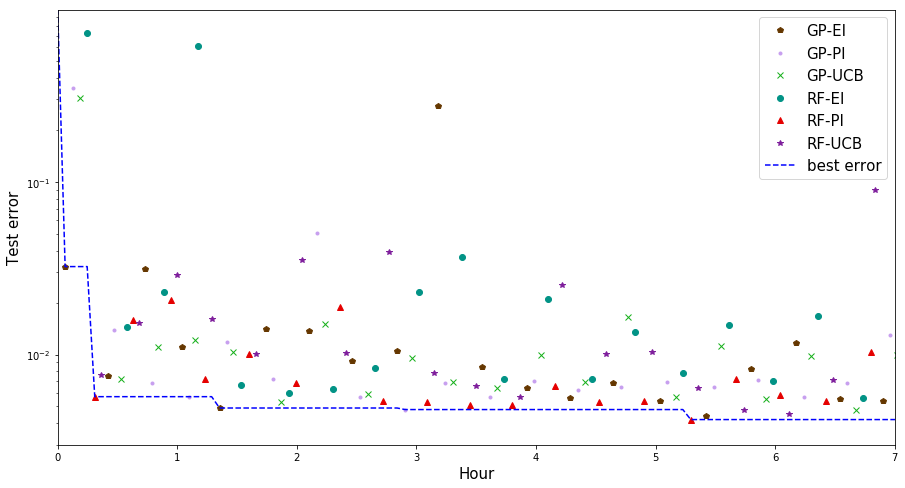

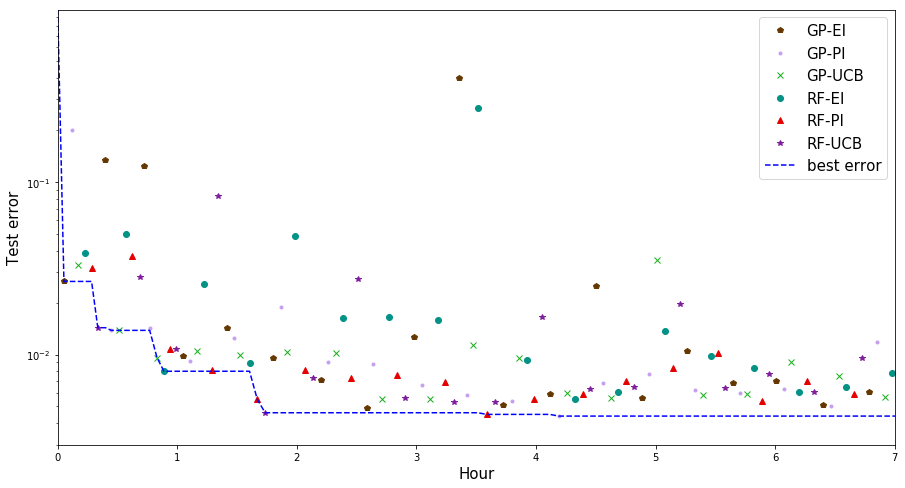

In [39]:
for i in range(10):
    draw_trials_curve(div10_results, "S-Div", i, ylim=(.003, .99), xlim=(0, 6+1), 
                  width=15, height=8, loc=1 )

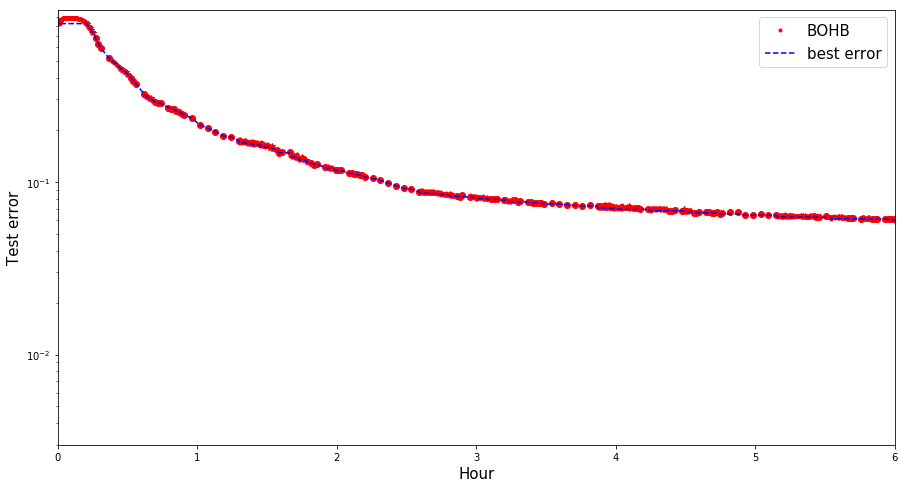

In [35]:
draw_trials_curve(bohb_results, 'BOHB', 0, ylim=(.003, .99), xlim=(0, 6), 
                  width=15, height=8, loc=1 )